# -1 Jupyter notebook specific - of no further interest

# 0 Load required packages

In [1]:
# External dependencies
import time
from casadi import *
from plot_efficient_frontier import plot_frontier_carlos as plot_frontier

# Internal dependencies
from life_cycle_gradient_descent import run_sim as run_sim_gradient
from life_cycle_gradient_descent import multi_gradient_descent_step
from lifecycle import *
from auxiliary_functions import init_optimization_problem
from main import execute_moo_optimization

from IPython.display import display, clear_output
import plotly as py
import plotly.graph_objs as go

# 1 Set up life-cycle environment 

### 1.2 Set environment parameter

In [10]:
conf = {
        'tax_setting': 5,       # tax setting: see below for detailed explanation
        'beta': 0.95,           # Utility discounting
        'r_debt': 0.15,         # debt interest rate
        'r': 0.05,
        'T': 60,                # agent's maturity
        'T_ret': 45,            # retirement age
        'L_max': 10,            # maximum labour 
        'gamma': [0.5],         # Agent's utility from consumption
        'eta': [1],             # Agent's disutility from labour
        'plot': False,
        'plot_steps': False,
        'plot_GD_steps': True,
        'h': 1E-6,              # step size finite difference 
        'n_steps_max': 20,      # max number of steps for 1 point on pareto frontier
        'k_max': 40,            # max number of steps for bi-linear search
        'tol': 1E-4,            # tolerance TODO explanation
        'tol_line_search': 1E-8,# tolerance to abort line search
        'serial': False,
        'max_debt': 2,
        'costb': 0.02,
        'borrowing': np.inf,     # np.inf -> allow unlimited borrowing // 0 -> allow no borrowing
        'n_starting_points': 50 # number of starting points for "frontier searching"
        }

### 1.3 Set up Optimization Problem

# 2 Compute Pareto Frontier

[TODO text about multi gradient step]

In [11]:
result_array, intermediate = execute_moo_optimization(conf)
[pv_rev_d, pv_util_d, tk_d, tl_d, tc_d] = result_array.tolist()

-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
This is casadi::QRQP
-------------------------------------------
This is casadi::QRQP
This is casadi::QRQP
-------------------------------------------
This is casadi::QRQP
-------------------------------------------
This is casadi::QRQP
-------------------------------------------
Number of variables:                             302
This is casadi::QRQP
-------------------------------------------
This is casadi::QRQP
Number of variables:                             302
Number of variables:                             302
Number of variables:                             302
This is casadi::QRQP
Number of constraints:                           120
This is casadi::QRQP
This is casadi::QRQP
Number of variables:                     

CasADi - 2019-10-13 16:48:15 WARNING("S:nlp_fg failed: NaN detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2019-10-13 16:48:15 WARNING("S:nlp_fg failed: NaN detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2019-10-13 16:48:15 WARNING("S:nlp_fg failed: NaN detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2019-10-13 16:48:15 WARNING("S:nlp_fg failed: NaN detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2019-10-13 16:48:15 WARNING("S:nlp_fg failed: NaN detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2019-10-13 16:48:15 WARNING("S:nlp_fg failed: NaN detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2019-10-13 16:48:15 WARNING("S:nlp_fg failed: NaN detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_fun

Elapsed time 6.27340841293335 
 n_procs  11 
 n_points  44


# 3 Visualize Pareto Frontier Construction

For the visualization we make use of the python package ``plotly``.

In [58]:

fig = go.FigureWidget(py.subplots.make_subplots(rows = 2, cols=3 ))

fig.update_xaxes(range=[0, max(pv_rev_d)+5])
fig.update_yaxes(range=[0,1])
fig.update_yaxes(range=[min(pv_util_d)-10,max(pv_util_d)+10], row=1, col=2)
print("")

In [59]:
fig

FigureWidget({
    'data': [],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'doma…

In [60]:
for i in range(len(pv_rev_d)):
    for j in range(min(10, len(intermediate[i]['util']))):
        fig.add_trace(go.Scatter(x=intermediate[i]['rev'][j].full().squeeze(), y=intermediate[i]['util'][j].full().squeeze(), mode='markers', showlegend=False), row=1, col=2)
        fig.add_trace(go.Scatter(x=intermediate[i]['rev'][j].full().squeeze(), y=[intermediate[i]['tax_rates'][j][0]], showlegend=False), row=2, col=1)
        fig.add_trace(go.Scatter(x=intermediate[i]['rev'][j].full().squeeze(), y=[intermediate[i]['tax_rates'][j][1]], mode='markers',showlegend=False), row=2, col=2)
        fig.add_trace(go.Scatter(x=intermediate[i]['rev'][j].full().squeeze(), y=[intermediate[i]['tax_rates'][j][2]], mode='markers', showlegend=False), row=2, col=3)
        time.sleep(1)
    
    time.sleep(1)
    fig.data=()
    fig.add_trace(go.Scatter(x=pv_rev_d[:i+1], y=pv_util_d[:i+1], mode='markers', showlegend=False), row=1, col=2)
    fig.add_trace(go.Scatter(x=pv_rev_d[:i+1], y=tk_d[:i+1], mode='markers', showlegend=False), row=2, col=1)
    fig.add_trace(go.Scatter(x=pv_rev_d[:i+1], y=tl_d[:i+1], mode='markers',showlegend=False), row=2, col=2)
    fig.add_trace(go.Scatter(x=pv_rev_d[:i+1], y=tc_d[:i+1], mode='markers', showlegend=False), row=2, col=3)
    
     

KeyboardInterrupt: 

In [19]:
fig.data=()

In [7]:
len(pv_rev_d)

44

In [68]:
fig.add_trace(go.Scatter(x=intermediate[i]['rev'][j].full().squeeze(), y=[intermediate[i]['tax_rates'][j][0]], mode='markers', showlegend=False), row=2, col=1)
        

FigureWidget({
    'data': [{'mode': 'markers',
              'showlegend': False,
              'type': 'scat…

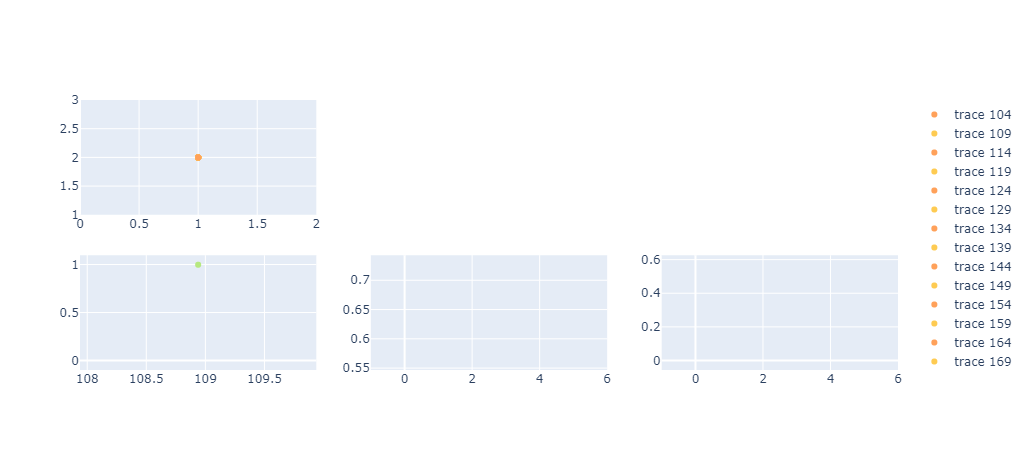

In [69]:
fig.show()

In [ ]:
[pv_rev_d, pv_util_d, tk_d, tl_d, tc_d] = result_array.tolist()

# 3 Postprocessing

In [1]:
[pv_rev_d, pv_util_d, tk_d, tl_d, tc_d] = result_array.tolist()
plot_frontier(pv_rev_d, pv_util_d, tk_d, tl_d, tc_d, conf,
                  timestr + "_gamma_" + str(conf['gamma']) + "_eta_" +
                  str(conf["eta"]) + "_tax_setting_" + str(conf["tax_setting"]))

NameError: name 'result_array' is not defined

In [20]:
tc_global

[0.0]